In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates



# BGL line plot



In [2]:
BGL_timeline= pd.read_csv("output/BGL_timeline.csv")

In [3]:
BGL_timeline.dropna(inplace=True)
BGL_timeline.sort_values(by='date')

BGL_timeline.head()


,date,num_logs,num_anomalies
0,2005-06-03-22,4430,0
1,2005-06-03-23,5412,0
2,2005-06-04-00,4302,0
3,2005-06-04-01,519,0
4,2005-06-04-02,8,0


In [12]:
#BGL_group_by_date= BGL_timeline.groupby(BGL_timeline["date"]).mean().reset_index()
BGL_SMA=BGL_timeline.copy()
BGL_SMA.sort_values(by='date')

BGL_SMA['SMA30'] = BGL_SMA['num_logs'].rolling(30).mean()
BGL_SMA['SMA30_anomalies'] = BGL_SMA['num_anomalies'].rolling(30).mean()


BGL_SMA.sort_values(by='date')
BGL_SMA.dropna(inplace=True)


#print(BGL_SMA['date'].min())
#print(BGL_SMA['date'].max())
BGL_SMA.head()

,date,num_logs,num_anomalies,SMA30,SMA30_anomalies
29,2005-06-05-16,20728,0,3539.000000,86.966667
30,2005-06-05-17,12645,0,3812.833333,86.966667
31,2005-06-05-18,22,0,3633.166667,86.966667
32,2005-06-05-19,3,0,3489.866667,86.966667
33,2005-06-05-20,1,0,3472.600000,86.966667


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns


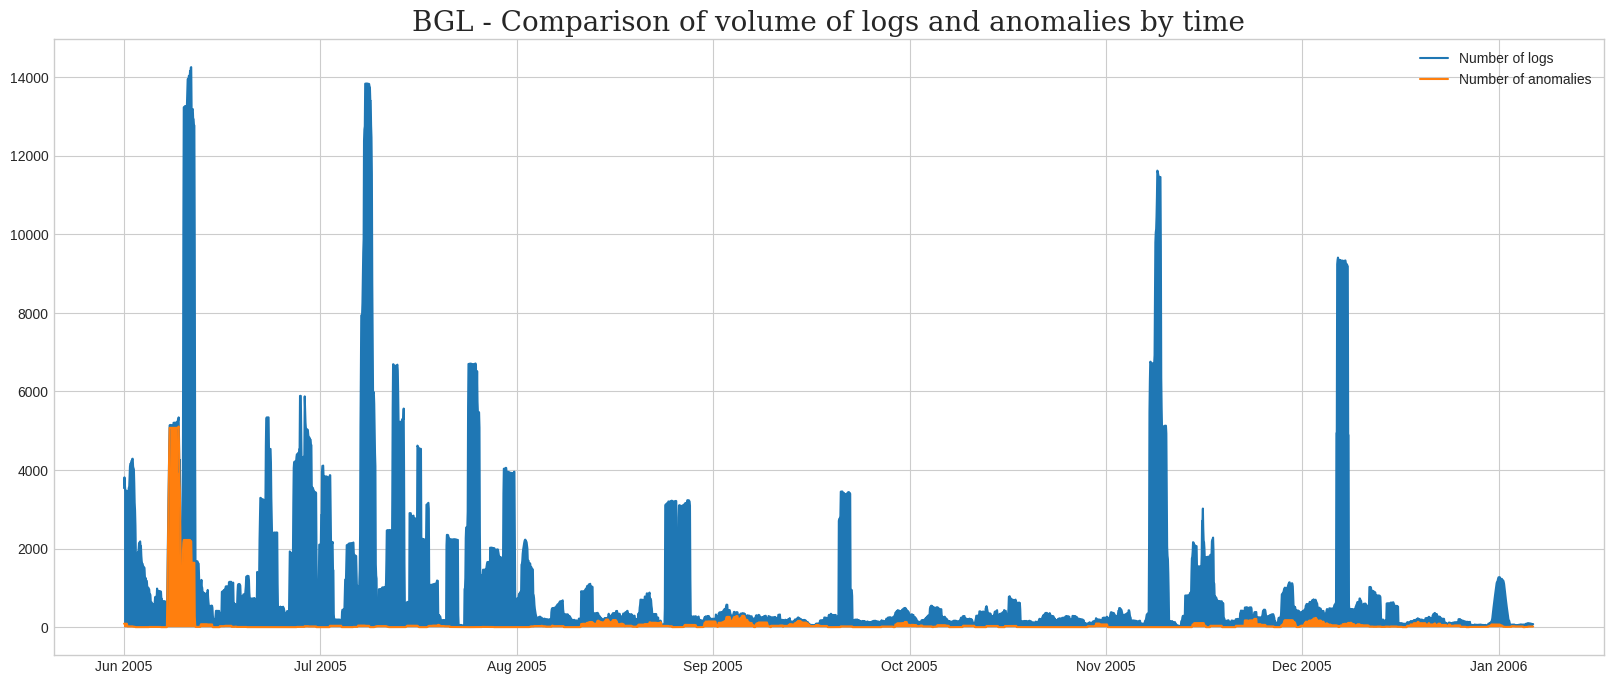

In [74]:
fig, ax = plt.subplots(1, figsize = (20, 8))

plt.plot(BGL_SMA["date"], BGL_SMA["SMA30"], label='Number of logs')
plt.plot(BGL_SMA["date"], BGL_SMA["SMA30_anomalies"],  label='Number of anomalies')

# Function add a legend
plt.legend()
ax.set_xticks([0,500,1000,1500,2000,2500,3000,3500])
ax.set_xticklabels(['Jun 2005','Jul 2005','Aug 2005','Sep 2005','Oct 2005','Nov 2005','Dec 2005','Jan 2006'])
font1 = {'family':'serif','size':20}

plt.fill_between(BGL_SMA["date"], BGL_SMA["SMA30"])
plt.fill_between(BGL_SMA["date"], BGL_SMA["SMA30_anomalies"])


plt.title("BGL - Comparison of volume of logs and anomalies by time", fontdict = font1)
ax.set(ylabel=None)
ax.set(xlabel=None)

plt.show()



# Thunderbird line plot

In [75]:
Thuderbird_timeline= pd.read_csv("output/Thunderbird_timeline.csv")
Thuderbird_timeline.dropna(inplace=True)
Thuderbird_timeline.sort_values(by='date')

Thuderbird_timeline.head()

,date,num_logs,num_anomalies
0,2005-11-09-08,36,0
1,2005-11-09-09,58,0
2,2005-11-09-10,17,0
3,2005-11-09-11,10,0
4,2005-11-09-12,6,0


In [76]:
Thunderbird_SMA=Thuderbird_timeline.copy()
Thunderbird_SMA.sort_values(by='date')

Thunderbird_SMA['SMA30'] = Thunderbird_SMA['num_logs'].rolling(30).mean()
Thunderbird_SMA['SMA30_anomalies'] = Thunderbird_SMA['num_anomalies'].rolling(30).mean()

Thunderbird_SMA.dropna(inplace=True)


Thunderbird_SMA.head()

print(Thunderbird_SMA['date'].min())
print(Thunderbird_SMA['date'].max())

2005-11-10-17
2006-07-11-22


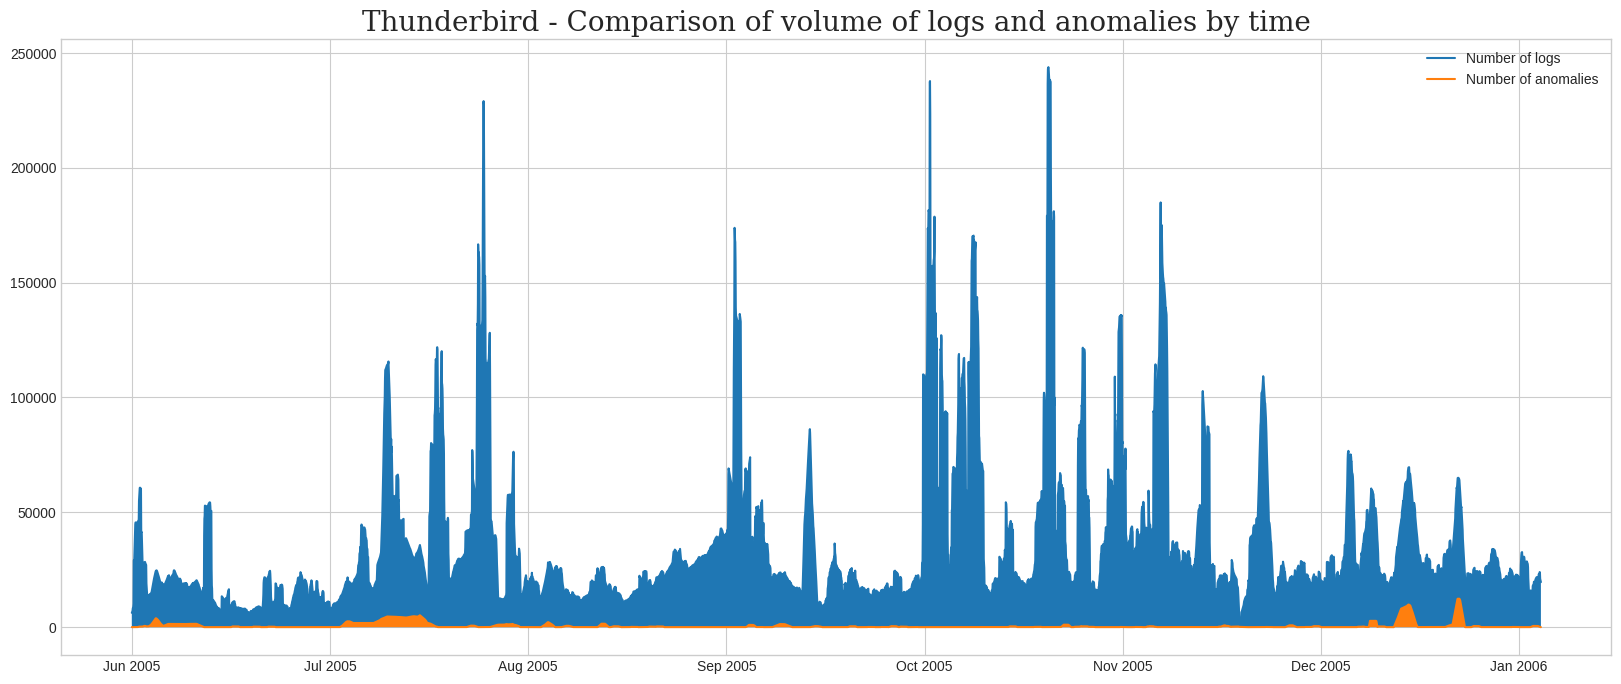

In [77]:
fig, ax = plt.subplots(1, figsize = (20, 8))

plt.plot(Thunderbird_SMA["date"], Thunderbird_SMA["SMA30"], label='Number of logs')
plt.plot(Thunderbird_SMA["date"], Thunderbird_SMA["SMA30_anomalies"],  label='Number of anomalies')

# Function add a legend
plt.legend()
ax.set_xticks([0,800,1600,2400,3200,4000,4800,5600])
ax.set_xticklabels(['Jun 2005','Jul 2005','Aug 2005','Sep 2005','Oct 2005','Nov 2005','Dec 2005','Jan 2006'])
font1 = {'family':'serif','size':20}

plt.fill_between(Thunderbird_SMA["date"], Thunderbird_SMA["SMA30"])
plt.fill_between(Thunderbird_SMA["date"], Thunderbird_SMA["SMA30_anomalies"])


plt.title("Thunderbird - Comparison of volume of logs and anomalies by time", fontdict = font1)
ax.set(ylabel=None)
ax.set(xlabel=None)

plt.show()

